In [93]:
#'/Users/laurenneel/Documents/repo_energetics/energetics-model/output.csv'

import matplotlib.pyplot as plt
from time import time as what_time
from random import choice, gauss
import numpy as np
from numpy.random import *
from scipy.stats.mstats import *
from scipy.interpolate import interp1d
from numpy.random import uniform, seed, normal, binomial
from numpy import pi, min, max, percentile, radians, degrees
from numpy.fft import ifft2
import multiprocessing
from time import time
from scipy.interpolate import *
#from matplotlib.mlab import prctile as percent
from numpy import flipud
from math import exp, log, sin, cos, sqrt, acos, asin, atan, atan2
#from numpy import arctan as atan
#from numpy import arctan2 as atan2
#from numpy import arcsin as asin
#from numpy import arccos as acos
import pandas as pd ## added by LN
import math
import csv

LR_full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_LR_27feb.csv')
#full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_copy.csv')
LR_df90 = LR_full_df[(LR_full_df['J'] == 90) & (LR_full_df['time'] >= 7.5)]
LR_df180 = LR_full_df[(LR_full_df['J'] == 180) & (LR_full_df['time'] >= 7.5)]
LR_df270 = LR_full_df[(LR_full_df['J'] == 270) & (LR_full_df['time'] >= 7.5)]
LR_df360 = LR_full_df[(LR_full_df['J'] == 360) & (LR_full_df['time'] >= 7.5)]

#LR_full_df2 = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_LR_te.csv')
##full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_copy.csv')
#LR_df90_2 = LR_full_df2[(LR_full_df2['J'] == 90) & (LR_full_df2['time'] >= 7.5)]
#LR_df180_2 = LR_full_df2[(LR_full_df2['J'] == 180) & (LR_full_df2['time'] >= 7.5)]
#LR_df270_2 = LR_full_df2[(LR_full_df2['J'] == 270) & (LR_full_df2['time'] >= 7.5)]
#LR_df360_2 = LR_full_df2[(LR_full_df2['J'] == 360) & (LR_full_df2['time'] >= 7.5)]
#
#LR_full_df3 = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_LR_27feb.csv')
##full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_copy.csv')
#LR_df90_3 = LR_full_df3[(LR_full_df3['J'] == 90) & (LR_full_df3['time'] >= 7.5)]
#LR_df180_3 = LR_full_df3[(LR_full_df3['J'] == 180) & (LR_full_df3['time'] >= 7.5)]
#LR_df270_3 = LR_full_df3[(LR_full_df3['J'] == 270) & (LR_full_df3['time'] >= 7.5)]
#LR_df360_3 = LR_full_df3[(LR_full_df3['J'] == 360) & (LR_full_df3['time'] >= 7.5)]

TC_full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/TC_output_copy_27feb.csv')
TC_df90 = TC_full_df[(TC_full_df['J'] == 90) & (TC_full_df['time'] >= 6.5)]
TC_df180 = TC_full_df[(TC_full_df['J'] == 180) & (TC_full_df['time'] >= 6.5)]
TC_df270 = TC_full_df[(TC_full_df['J'] == 270) & (TC_full_df['time'] >= 6.5)]
TC_df360 = TC_full_df[(TC_full_df['J'] == 360) & (TC_full_df['time'] >= 6.5)]

RP_full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/RP_output_copy.csv')
#full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_copy.csv')
RP_df90 = RP_full_df[(RP_full_df['J'] == 90) & (RP_full_df['time'] >= 7.5)]
RP_df180 = RP_full_df[(RP_full_df['J'] == 180) & (RP_full_df['time'] >= 7.5)]
RP_df270 = RP_full_df[(RP_full_df['J'] == 270) & (RP_full_df['time'] >= 7.5)]
RP_df360 = RP_full_df[(RP_full_df['J'] == 360) & (RP_full_df['time'] >= 7.5)]

WC_full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/WC_output_copy.csv')
#full_df = pd.read_csv('/Users/laurenneel/Documents/repo_energetics/energetics-model/output/output_copy.csv')
WC_df90 = WC_full_df[(WC_full_df['J'] == 90) & (WC_full_df['time'] >= 7.5)]
WC_df180 = WC_full_df[(WC_full_df['J'] == 180) & (WC_full_df['time'] >= 7.5)]
WC_df270 = WC_full_df[(WC_full_df['J'] == 270) & (WC_full_df['time'] >= 7.5)]
WC_df360 = WC_full_df[(WC_full_df['J'] == 360) & (WC_full_df['time'] >= 7.5)]

#display(TC_full_df)
display(LR_df90)

,time,J,x,y,sun,te,min_te,max_te,tb,total_activity,mei,net,moved,smr,energy_balance
74850,7.505212,90.0,108.999107,48.204995,1,10.837589,7.473913,17.344059,10.700997,13273.0,-5.221609,0.096125,0.0,0.096125,21774.078702
74851,7.521890,90.0,108.999107,48.204995,1,10.890337,7.470713,17.528713,10.737240,13273.0,-5.196097,0.096431,0.0,0.096431,21774.175133
74852,7.538568,90.0,108.999107,48.204995,1,10.943079,7.467514,17.713342,10.776642,13273.0,-5.168408,0.096764,0.0,0.096764,21774.271896
74853,7.555247,90.0,108.999107,48.204995,1,10.995810,7.464315,17.897931,10.818595,13273.0,-5.138979,0.097120,0.0,0.097120,21774.369016
74854,7.571925,90.0,108.999107,48.204995,1,11.048528,7.461116,18.082468,10.862608,13273.0,-5.108163,0.097494,0.0,0.097494,21774.466510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75595,19.930507,90.0,108.999107,48.204995,1,19.407589,17.290414,16.394475,19.641178,13755.0,-0.164020,0.210167,0.0,0.210167,22236.645876
75596,19.947186,90.0,108.999107,48.204995,1,19.354114,17.256824,16.331167,19.587393,13755.0,-0.187073,0.209180,0.0,0.209180,22236.855057
75597,19.963864,90.0,108.999107,48.204995,1,19.300642,17.223237,16.267862,19.533667,13755.0,-0.210189,0.208199,0.0,0.208199,22237.063256
75598,19.980542,90.0,108.999107,48.204995,1,19.247173,17.189652,16.204560,19.479989,13755.0,-0.233372,0.207224,0.0,0.207224,22237.270480


In [94]:

#from IPython.core.display import display, HTML
#display(HTML('<h1> Large Rock </h1>'))
#
## create a line plot with time (minute) on the x-axis and te and tb on the y-axis
#LR_df90.plot(x='time', y=['te_min', 'te_max', 'tb'])
#plt.title('T_e and T_b over time for day J=90')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
#LR_df180.plot(x='time', y=['te_min', 'te_max', 'tb'])
#plt.title('T_e and T_b over time for day J=180')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
#LR_df270.plot(x='time', y=['te_min', 'te_max', 'tb'])
#plt.title('T_e and T_b over time for day J=270')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
#LR_df360.plot(x='time', y=['te_min', 'te_max', 'tb'])
#plt.title('T_e and T_b over time for day J=360')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
## show the plot
#plt.show()
#
#
#LR_df90_3.plot(x='time', y=['min_te', 'max_te', 'tb'])
#plt.title('T_e and T_b over time for day J=90')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
#LR_df180_3.plot(x='time', y=['min_te', 'max_te', 'tb'])
#plt.title('T_e and T_b over time for day J=180')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
#LR_df270_3.plot(x='time', y=['min_te', 'max_te', 'tb'])
#plt.title('T_e and T_b over time for day J=270')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
#LR_df360_3.plot(x='time', y=['min_te', 'max_te', 'tb'])
#plt.title('T_e and T_b over time for day J=360')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
##plt.ylim(0,40)
#
## show the plot
#plt.show()
#

In [95]:
# filter the data for the variables of interest (mei, tb, smr, moved)
df_subset_LR = LR_full_df[['J', 'mei', 'tb', 'te','min_te', 'max_te','smr', 'moved', 'energy_balance']]
df_subset_RP = RP_full_df[['J', 'mei', 'tb', 'te','min_te', 'max_te', 'smr', 'moved', 'energy_balance']]
df_subset_WC = WC_full_df[['J', 'mei', 'tb', 'te','min_te', 'max_te','smr', 'moved', 'energy_balance']]
df_subset_TC = TC_full_df[['J', 'mei', 'tb', 'te','min_te', 'max_te','smr', 'moved', 'energy_balance']]

df_subset_LR.name = 'Large Rock'
df_subset_RP.name = 'Rustler Park'
df_subset_WC.name = 'Wet Canyon'
df_subset_TC.name = 'Turkey Creek'

df_subset_LR['BCI_mean'] = 0.227
df_subset_RP['BCI_mean']  = 0.218
df_subset_WC['BCI_mean']  = 0.225
df_subset_TC['BCI_mean'] = 0.205

df_subset_LR['BCI_se']  = 0.0059
df_subset_RP['BCI_se']  = 0.0060
df_subset_WC['BCI_se'] = 0.0050
df_subset_TC['BCI_se']  = 0.0033





/var/folders/rn/xqmslljs7jgd06728s6psn080000gp/T/ipykernel_23367/2905689395.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_LR['BCI_mean'] = 0.227
/var/folders/rn/xqmslljs7jgd06728s6psn080000gp/T/ipykernel_23367/2905689395.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset_RP['BCI_mean']  = 0.218
/var/folders/rn/xqmslljs7jgd06728s6psn080000gp/T/ipykernel_23367/2905689395.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

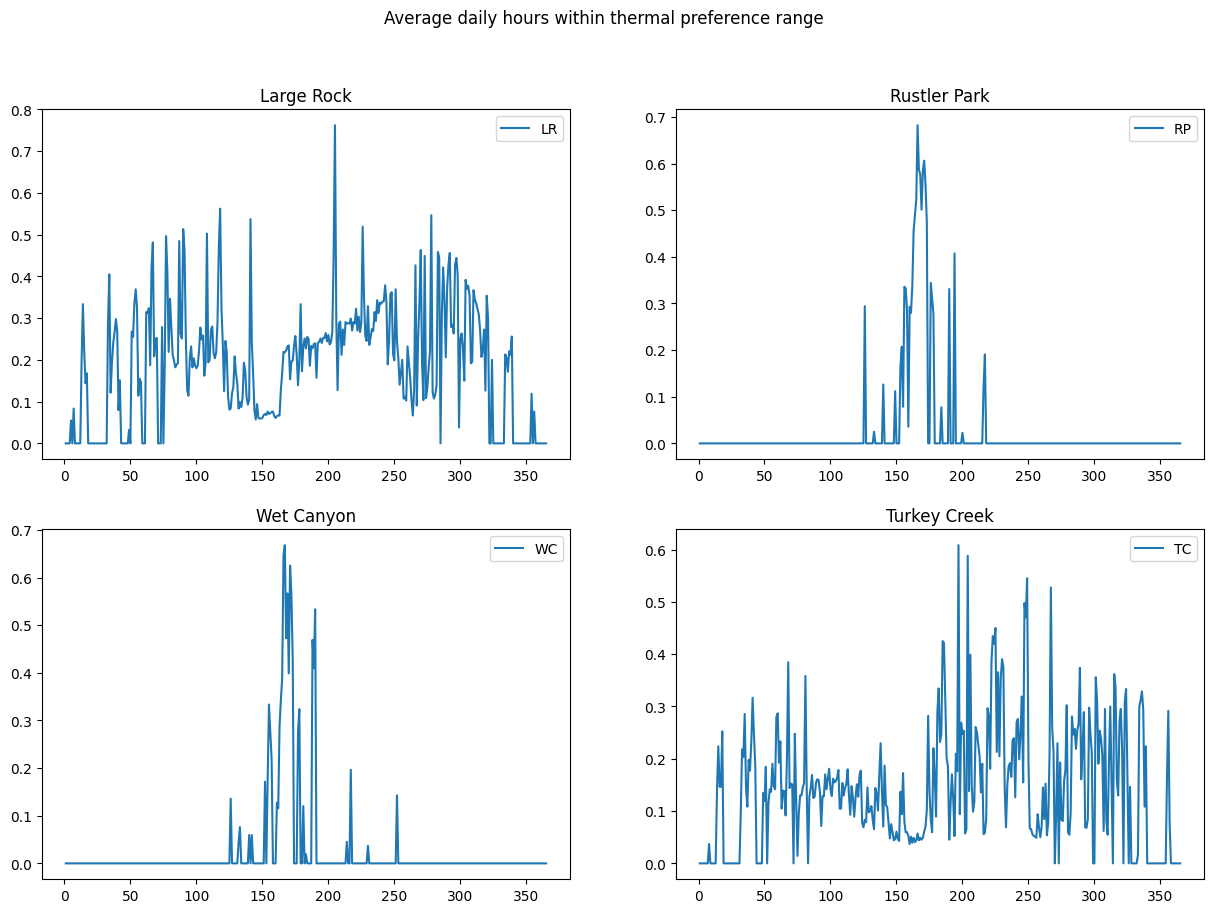

In [96]:

def mark_within_range(tb):
    if tb >= 30 and tb <= 38:
        return 1
    else:
        return 0

# Reset the index so that the 'J' column becomes a regular column
df_subset_LR = df_subset_LR.reset_index()
df_subset_RP = df_subset_RP.reset_index()
df_subset_WC = df_subset_WC.reset_index()
df_subset_TC = df_subset_TC.reset_index()


# Group the data by day and calculate the proportion of time that 'tb' is within the range
df_subset_LR['within_range'] = df_subset_LR['tb'].apply(mark_within_range)
df_subset_RP['within_range'] = df_subset_RP['tb'].apply(mark_within_range)
df_subset_WC['within_range'] = df_subset_WC['tb'].apply(mark_within_range)
df_subset_TC['within_range'] = df_subset_TC['tb'].apply(mark_within_range)


df_subset_LR_avg = df_subset_LR.groupby('J')['within_range'].mean()
df_subset_RP_avg = df_subset_RP.groupby('J')['within_range'].mean()
df_subset_WC_avg = df_subset_WC.groupby('J')['within_range'].mean()
df_subset_TC_avg = df_subset_TC.groupby('J')['within_range'].mean()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(df_subset_LR_avg, label='LR')
axs[0, 1].plot(df_subset_RP_avg, label='RP')
axs[1, 0].plot(df_subset_WC_avg, label='WC')
axs[1, 1].plot(df_subset_TC_avg, label='TC')

# Set the title and legend for each subplot
axs[0, 0].set_title('Large Rock')
axs[0, 1].set_title('Rustler Park')
axs[1, 0].set_title('Wet Canyon')
axs[1, 1].set_title('Turkey Creek')
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

fig.suptitle('Average daily hours within thermal preference range')


plt.show()

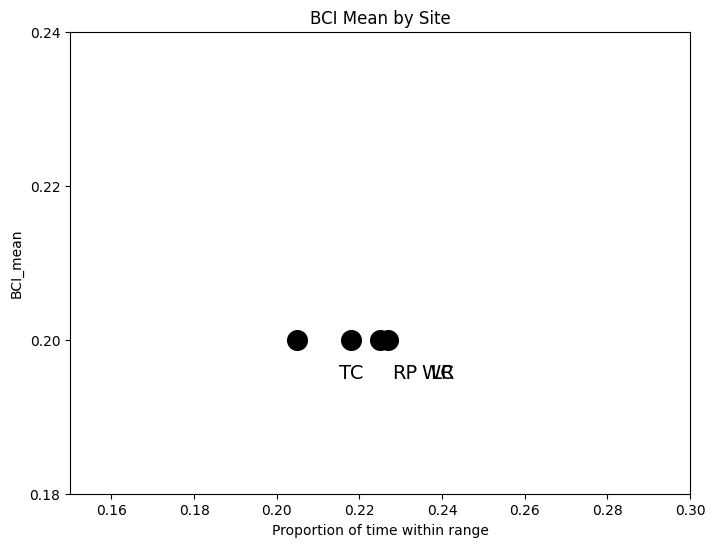

In [97]:
# Calculate the overall average where tb is within range for each dataset
df_subset_LR_avg_within_range = df_subset_LR[df_subset_LR['tb'].between(30, 38)]['BCI_mean'].mean()
df_subset_RP_avg_within_range = df_subset_RP[df_subset_RP['tb'].between(30, 38)]['BCI_mean'].mean()
df_subset_WC_avg_within_range = df_subset_WC[df_subset_WC['tb'].between(30, 38)]['BCI_mean'].mean()
df_subset_TC_avg_within_range = df_subset_TC[df_subset_TC['tb'].between(30, 38)]['BCI_mean'].mean()

# Create a new dataframe with the calculated averages and the BCI_mean values
df_avg_within_range = pd.DataFrame({'BCI_mean': [0.227, 0.218, 0.225, 0.205],
                                    'within_range_avg': [df_subset_LR_avg_within_range, df_subset_RP_avg_within_range,                                                         df_subset_WC_avg_within_range, df_subset_TC_avg_within_range]},
                                   index=['LR', 'RP', 'WC', 'TC'])

# Create a dataframe with site names and BCI_mean values
df = pd.DataFrame({'Site': ['LR', 'RP', 'WC', 'TC'],
                   'BCI_mean': [0.227, 0.218, 0.225, 0.205]})

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Set the x-axis limits and ticks
ax.set_xlim(0.15, 0.3)
#ax.set_xticks([0.2, 0.4, 0.6, 0.8])
#ax.set_xticklabels(['20%', '40%', '60%', '80%'])

# Set the y-axis limits and ticks
ax.set_ylim(0.18, 0.24)
ax.set_yticks([0.18, 0.20, 0.22, 0.24])
#ax.set_yticklabels(['18%', '20%', '22%', '24%'])

# Plot a single symbol for each site
ax.scatter(df['BCI_mean'], [0.2]*4, marker='o', color='black', s=200)

# Add labels for the x-axis and y-axis
ax.set_xlabel('Proportion of time within range')
ax.set_ylabel('BCI_mean')

# Add text labels for the site names
for i, row in df.iterrows():
    ax.text(row['BCI_mean'] + 0.01, 0.195, row['Site'], fontsize=14)

# Add a title to the figure
ax.set_title('BCI Mean by Site')

plt.show()

In [98]:

#from IPython.core.display import display, HTML
#display(HTML('<h1> Rustler Park </h1>'))
#
## create a line plot with time (minute) on the x-axis and te and tb on the y-axis
#RP_df90.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=90')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
#RP_df180.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=180')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
#RP_df270.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=270')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
#RP_df360.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=360')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
## show the plot
#plt.show()
#

In [99]:
#from IPython.core.display import display, HTML
#display(HTML('<h1> Turkey Creek </h1>'))
#
#
## create a line plot with time (minute) on the x-axis and te and tb on the y-axis
#TC_df90.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=90')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#plt.show()
#TC_df180.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=180')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
#TC_df270.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=270')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
#TC_df360.plot(x='time', y=['te', 'tb'])
#plt.title('T_e and T_b over time for day J=360')
#plt.xlabel('Time')
#plt.ylabel('Temperature (°C)')
#
## show the plot
#plt.show()


In [100]:
## create a new column to get activity hours per day
# Create a new column 'activity_per_day' by dividing 'total_activity' by 'day_of_year'
LR_full_df['activity_per_day'] = LR_full_df['total_activity'] / (LR_full_df['J']*840) #840 = # mins between 6:00-20:00 

# Print the updated DataFrame
print(LR_full_df.tail())


             time      J           x          y  sun         te     min_te  \
306595  19.930507  365.0  108.999107  48.204995    1  18.433762  10.860469   
306596  19.947186  365.0  108.999107  48.204995    1  18.435788  10.876802   
306597  19.963864  365.0  108.999107  48.204995    1  18.437814  10.893135   
306598  19.980542  365.0  108.999107  48.204995    1  18.439840  10.909469   
306599  19.997220  365.0  108.999107  48.204995    1  18.441866  10.925804   

           max_te         tb  total_activity       mei       net  moved  \
306595  16.232277  18.425205         73913.0 -0.706802  0.188955    0.0   
306596  16.230673  18.427231         73913.0 -0.705861  0.188988    0.0   
306597  16.229071  18.429257         73913.0 -0.704919  0.189022    0.0   
306598  16.227470  18.431282         73913.0 -0.703977  0.189055    0.0   
306599  16.225871  18.433308         73913.0 -0.703035  0.189089    0.0   

             smr  energy_balance  activity_per_day  
306595  0.188955   197325.7

In [118]:
#
#
## calculate daily averages
#daily_averages_LR = df_subset_LR.groupby('J').mean()
##daily_averages_RP = df_subset_RP.groupby('J').mean()
##daily_averages_WC = df_subset_WC.groupby('J').mean()
##daily_averages_TC = df_subset_TC.groupby('J').mean()
#
## plot the data
#fig, ax = plt.subplots(figsize=(10, 6))
#
##ax.plot(daily_averages.index, daily_averages['mei'], label='Daily MEI')
#ax.plot(daily_averages_LR.index, daily_averages_LR['tb'], label='Average daily Tb')
#ax.plot(daily_averages_LR.index, daily_averages_LR['te'], label='Average daily Te')
#ax.plot(daily_averages_LR.index, daily_averages_LR['min_te'], label='Average daily min Te')
#ax.plot(daily_averages_LR.index, daily_averages_LR['max_te'], label='Average daily max Te')
##ax.plot(daily_averages.index, daily_averages['smr'], label='Daily SMR')
##ax.plot(daily_averages.index, daily_averages['energy_balance'], label='Energy Balance')
##ax.plot(daily_averages.index, daily_averages['moved'], label='Average Moved')
#
#ax.set_xlabel('Day of Year')
#ax.set_ylabel('Value')
#ax.set_title('Daily Average Body and Operative Temps in Large Rock')
#ax.legend()
#
#plt.show()

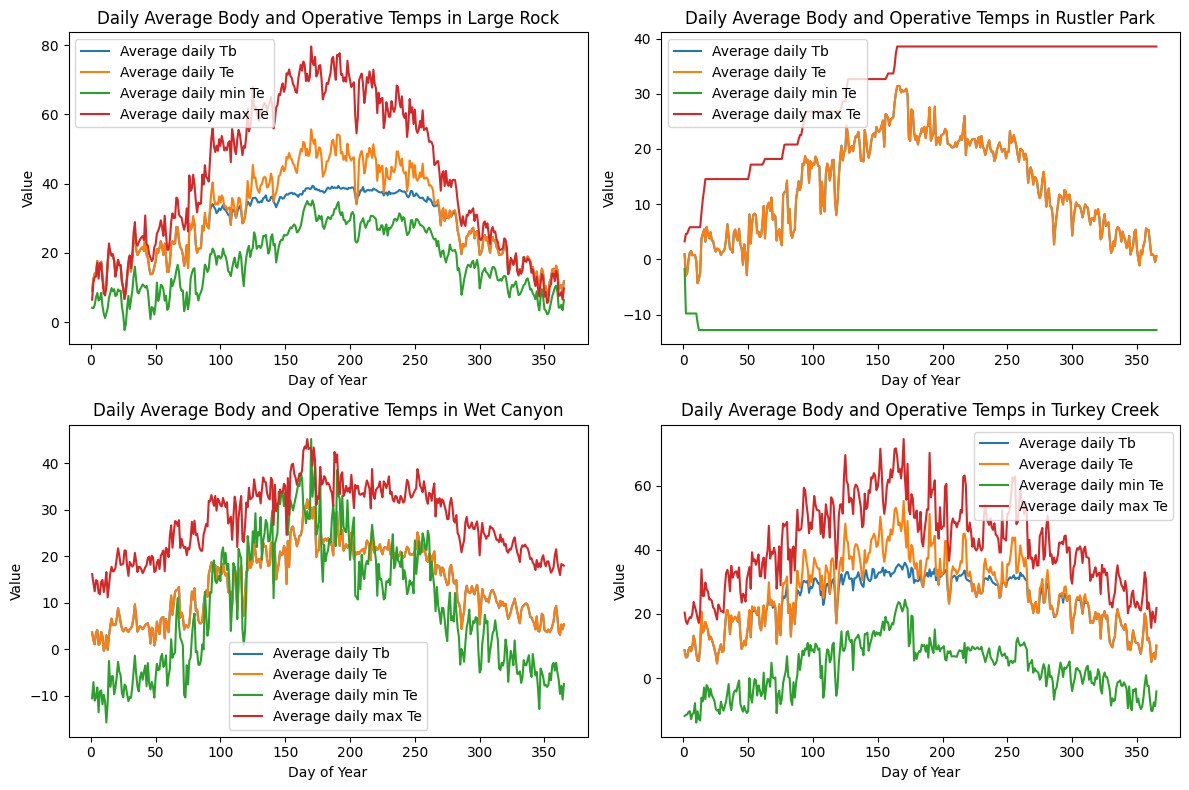

In [119]:
df_subset_LR.name = 'Large Rock'
df_subset_RP.name = 'Rustler Park'
df_subset_WC.name = 'Wet Canyon'
df_subset_TC.name = 'Turkey Creek'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# loop through each dataframe and plot it in a separate subplot
#for i, df in enumerate([daily_averages_LR, daily_averages_RP, daily_averages_WC, daily_averages_TC]):
for i, df in enumerate([df_subset_LR, df_subset_RP, df_subset_WC, df_subset_TC]):
    row = i // 2
    col = i % 2
    
    # calculate daily averages
    daily_averages = df[['J', 'tb', 'te', 'min_te', 'max_te']].groupby('J').mean()
    
    # plot the data
    axs[row, col].plot(daily_averages.index, daily_averages['tb'], label='Average daily Tb')
    axs[row, col].plot(daily_averages.index, daily_averages['te'], label='Average daily Te')
    axs[row, col].plot(daily_averages.index, daily_averages['min_te'], label='Average daily min Te')
    axs[row, col].plot(daily_averages.index, daily_averages['max_te'], label='Average daily max Te')
    axs[row, col].set_xlabel('Day of Year')
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Daily Average Body and Operative Temps in {df.name}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

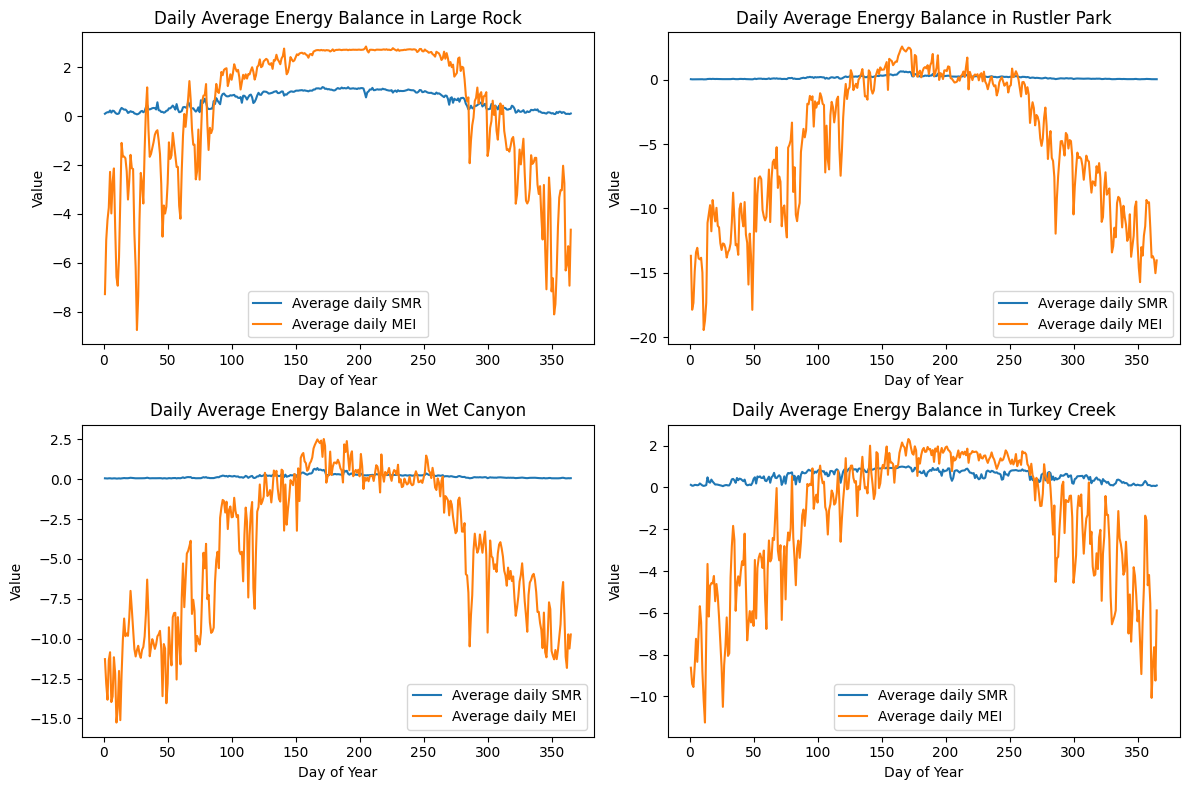

In [114]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# loop through each dataframe and plot it in a separate subplot
#for i, df in enumerate([daily_averages_LR, daily_averages_RP, daily_averages_WC, daily_averages_TC]):
for i, df in enumerate([df_subset_LR, df_subset_RP, df_subset_WC, df_subset_TC]):
    row = i // 2
    col = i % 2
    
    # calculate daily averages
    daily_averages = df[['J', 'mei', 'tb', 'te', 'smr', 'moved', 'energy_balance' ]].groupby('J').mean()

    #daily_averages = df[['J', 'tb', 'te', 'min_te', 'max_te']].groupby('J').mean()
    
    # plot the data
    axs[row, col].plot(daily_averages.index, daily_averages['smr'], label='Average daily SMR')
    axs[row, col].plot(daily_averages.index, daily_averages['mei'], label='Average daily MEI')
    #axs[row, col].plot(daily_averages.index, daily_averages['min_te'], label='Average daily min Te')
    #axs[row, col].plot(daily_averages.index, daily_averages['max_te'], label='Average daily max Te')
    axs[row, col].set_xlabel('Day of Year')
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Daily Average Energy Balance in {df.name}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

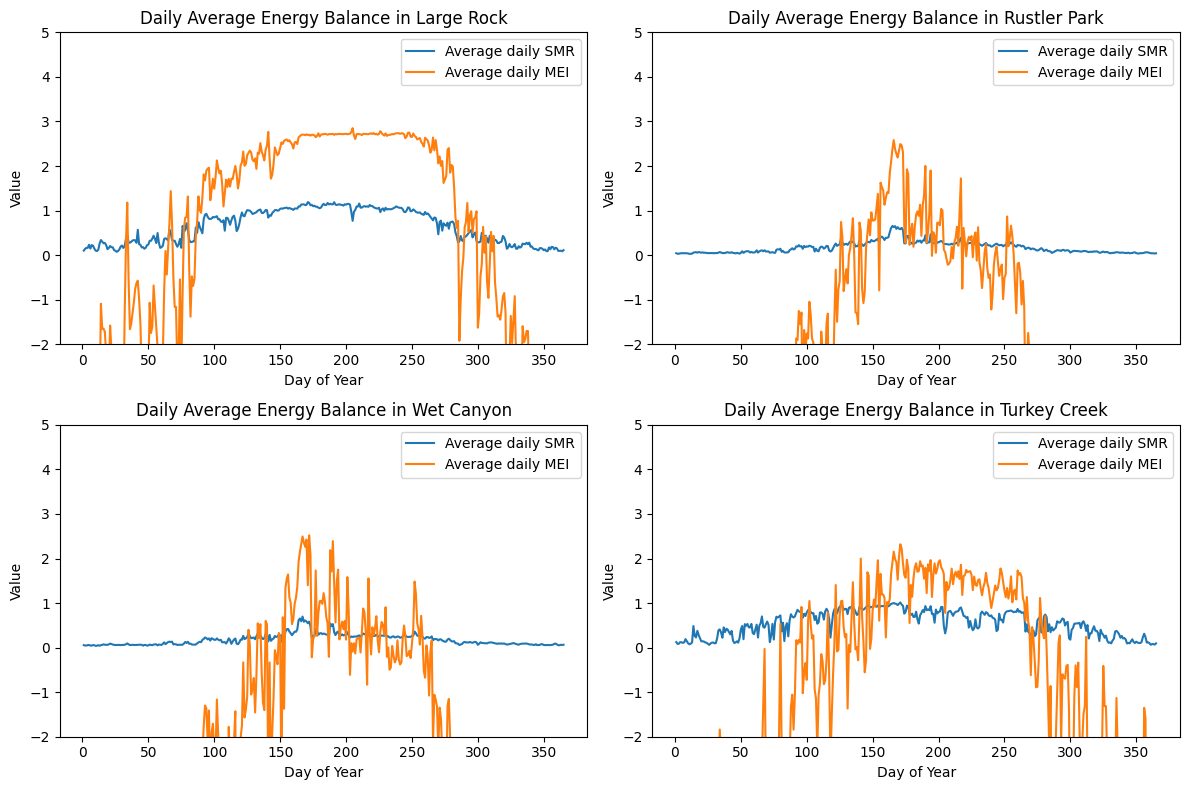

In [115]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# loop through each dataframe and plot it in a separate subplot
#for i, df in enumerate([daily_averages_LR, daily_averages_RP, daily_averages_WC, daily_averages_TC]):
for i, df in enumerate([df_subset_LR, df_subset_RP, df_subset_WC, df_subset_TC]):
    row = i // 2
    col = i % 2
    
    # calculate daily averages
    daily_averages = df[['J', 'mei', 'tb', 'te', 'smr', 'moved', 'energy_balance' ]].groupby('J').mean()

    #daily_averages = df[['J', 'tb', 'te', 'min_te', 'max_te']].groupby('J').mean()
    
    # plot the data
    axs[row, col].plot(daily_averages.index, daily_averages['smr'], label='Average daily SMR')
    axs[row, col].plot(daily_averages.index, daily_averages['mei'], label='Average daily MEI')
    #axs[row, col].plot(daily_averages.index, daily_averages['min_te'], label='Average daily min Te')
    #axs[row, col].plot(daily_averages.index, daily_averages['max_te'], label='Average daily max Te')
    axs[row, col].set_xlabel('Day of Year')
    axs[row, col].set_ylabel('Value')
    axs[row, col].set_title(f'Daily Average Energy Balance in {df.name}')
    axs[row, col].legend()
    axs[row, col].set_ylim([-2, 5])
    
    # set y-axis limits for each subplot
    #if i == 0:
    #    axs[row, col].set_ylim([0, 200])
    #elif i == 1:
    #    axs[row, col].set_ylim([-200, 0])
    #elif i == 2:
    #    axs[row, col].set_ylim([-50, 50])
    #elif i == 3:
    #    axs[row, col].set_ylim([-100, 100])

plt.tight_layout()
plt.show()

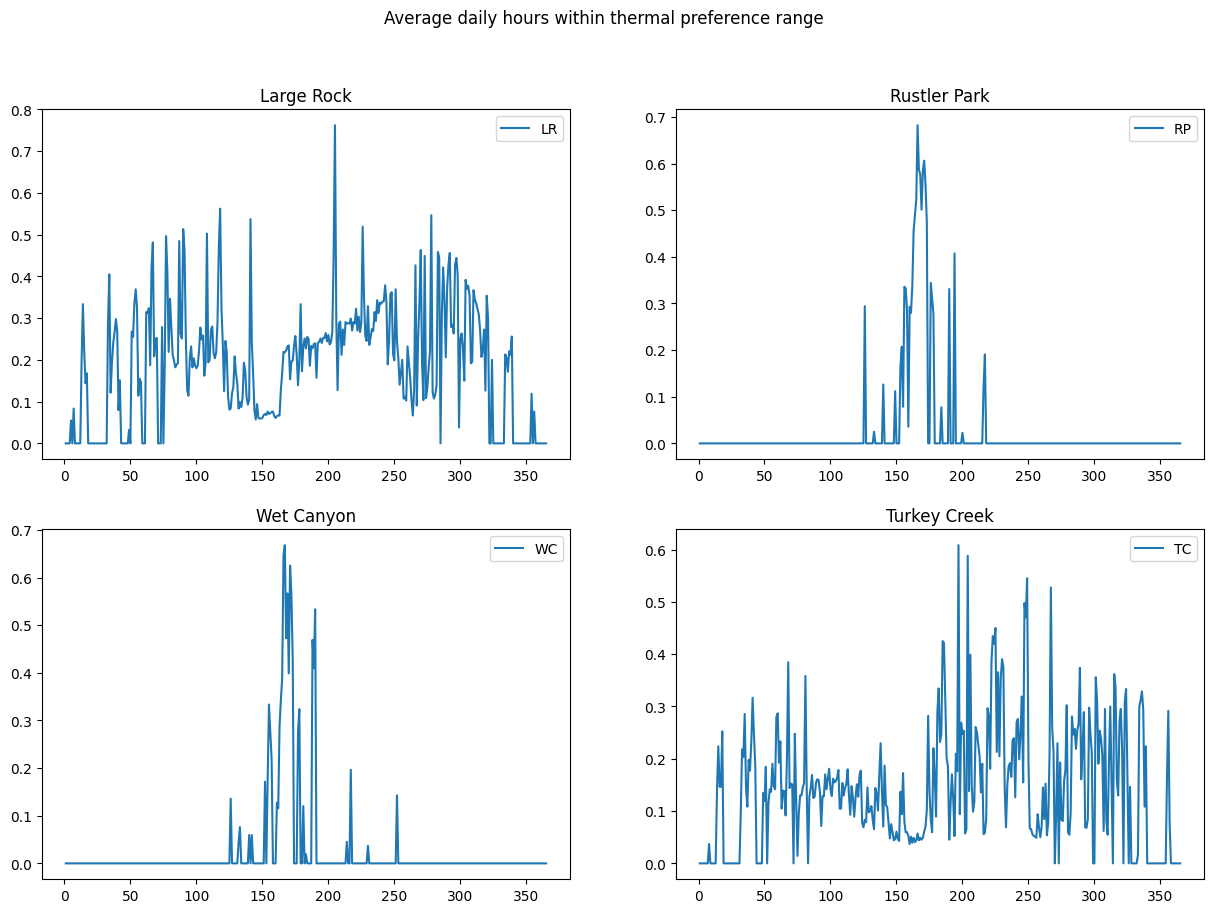

In [120]:
def mark_within_range(tb):
    if tb >= 30 and tb <= 38:
        return 1
    else:
        return 0

# Reset the index so that the 'J' column becomes a regular column
df_subset_LR = df_subset_LR.reset_index()
df_subset_RP = df_subset_RP.reset_index()
df_subset_WC = df_subset_WC.reset_index()
df_subset_TC = df_subset_TC.reset_index()


# Group the data by day and calculate the proportion of time that 'tb' is within the range
df_subset_LR['within_range'] = df_subset_LR['tb'].apply(mark_within_range)
df_subset_RP['within_range'] = df_subset_RP['tb'].apply(mark_within_range)
df_subset_WC['within_range'] = df_subset_WC['tb'].apply(mark_within_range)
df_subset_TC['within_range'] = df_subset_TC['tb'].apply(mark_within_range)


df_subset_LR_avg = df_subset_LR.groupby('J')['within_range'].mean()
df_subset_RP_avg = df_subset_RP.groupby('J')['within_range'].mean()
df_subset_WC_avg = df_subset_WC.groupby('J')['within_range'].mean()
df_subset_TC_avg = df_subset_TC.groupby('J')['within_range'].mean()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].plot(df_subset_LR_avg, label='LR')
axs[0, 1].plot(df_subset_RP_avg, label='RP')
axs[1, 0].plot(df_subset_WC_avg, label='WC')
axs[1, 1].plot(df_subset_TC_avg, label='TC')

# Set the title and legend for each subplot
axs[0, 0].set_title('Large Rock')
axs[0, 1].set_title('Rustler Park')
axs[1, 0].set_title('Wet Canyon')
axs[1, 1].set_title('Turkey Creek')
axs[0, 0].legend()
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

fig.suptitle('Average daily hours within thermal preference range')


plt.show()

In [117]:
#fig, ax = plt.subplots(figsize=(10, 6))
#
#ax.plot(daily_averages.index, daily_averages['mei'], label='Daily MEI')
##ax.plot(daily_averages.index, daily_averages['tb'], label='Daily TB')
#ax.plot(daily_averages.index, daily_averages['smr'], label='Daily SMR')
##ax.plot(daily_averages.index, daily_averages['energy_balance'], label='Energy Balance')
##ax.plot(daily_averages.index, daily_averages['moved'], label='Average Moved')
#
#ax.set_xlabel('Day of Year')
#ax.set_ylabel('Value')
#ax.set_title('Daily Averages for Standard Metabolic Rates and Metabolizable Energy Intake in Large Rock')
#ax.legend()
#
plt.show()